In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.datasets import load_diabetes

In [11]:
data=load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [12]:
df.shape

(442, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [29]:
df['target_class'] = (df['target'] > 140).astype(int)
x=df.drop(['target','target_class'],axis=1)
y=df['target_class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [47]:
modelLog=LogisticRegression()
modelLog.fit(x_train,y_train)
y_pred=modelLog.predict(x_test)

In [41]:
y_test.ravel()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_18228\3086938938.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test.ravel()


array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0])

In [42]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0])

Creating Confusion Matrix

In [43]:
confusion_matrix(y_test,y_pred)

array([[47, 14],
       [10, 40]])

### Confusion Matrix For Logistic Regression
#### 47--> True Positive
#### 40--> True Negative
#### 14--> False Positive
#### 10--> False Negative

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
modelDec=DecisionTreeClassifier()
modelDec.fit(x_train,y_train)
y_predDecision=modelDec.predict(x_test)
y_predDecision

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0])

In [39]:
confusion_matrix(y_test,y_predDecision)

array([[42, 19],
       [12, 38]])

### Confusion Matrix For Decision Tree Classifier
#### 42--> True Positive
#### 38--> True Negative
#### 19--> False Positive
#### 12--> False Negative

From The Confusion matrix it is confirmed that logistic is better than decision tree classifier

Just confirming by roc and auc

In [45]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [49]:
y_probaLog=modelLog.predict_proba(x_test)[:,1]
y_probaDec=modelDec.predict_proba(x_test)[:,1]

In [51]:
auc_log=roc_auc_score(y_test,y_probaLog)
auc_Dec=roc_auc_score(y_test,y_probaDec)

In [52]:
fpr_logit,tpr_logit,_=roc_curve(y_test,y_probaLog)
fpr_Dec,tpr_Dec,_=roc_curve(y_test,y_probaDec)

In [53]:
import matplotlib.pyplot as plt

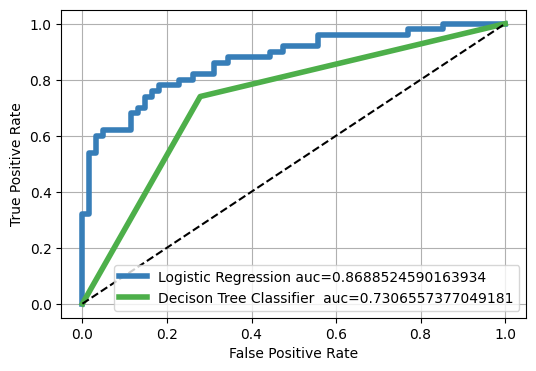

In [55]:
plt.figure(figsize=(6,4))
plt.plot(fpr_logit,tpr_logit,color='#377eb8',lw=4,label=f'Logistic Regression auc={auc(fpr_logit,tpr_logit)}')
plt.plot(fpr_Dec,tpr_Dec,color='#4daf4a',lw=4,label=f'Decison Tree Classifier  auc={auc(fpr_Dec,tpr_Dec)}')
plt.plot([0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend(loc='lower right')
plt.show()